In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [9]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [13]:
correlation_matrix=df.corr()

In [14]:
correlation_matrix

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


<Axes: >

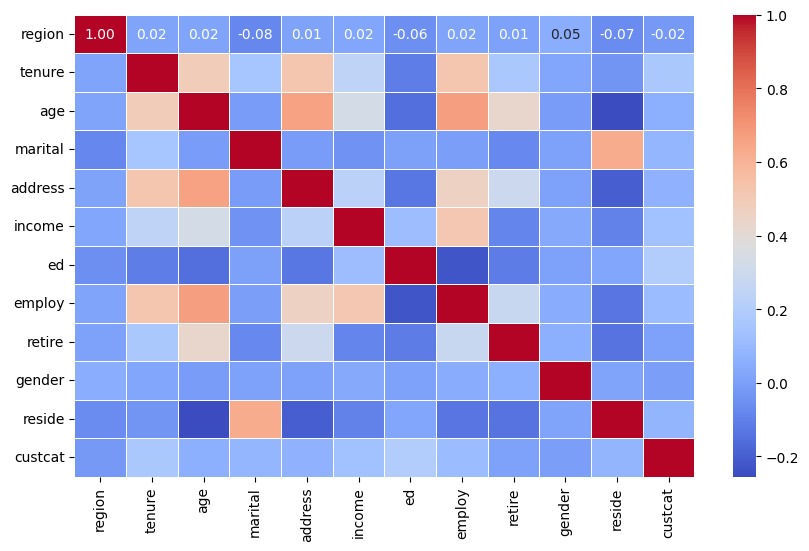

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

<Axes: >

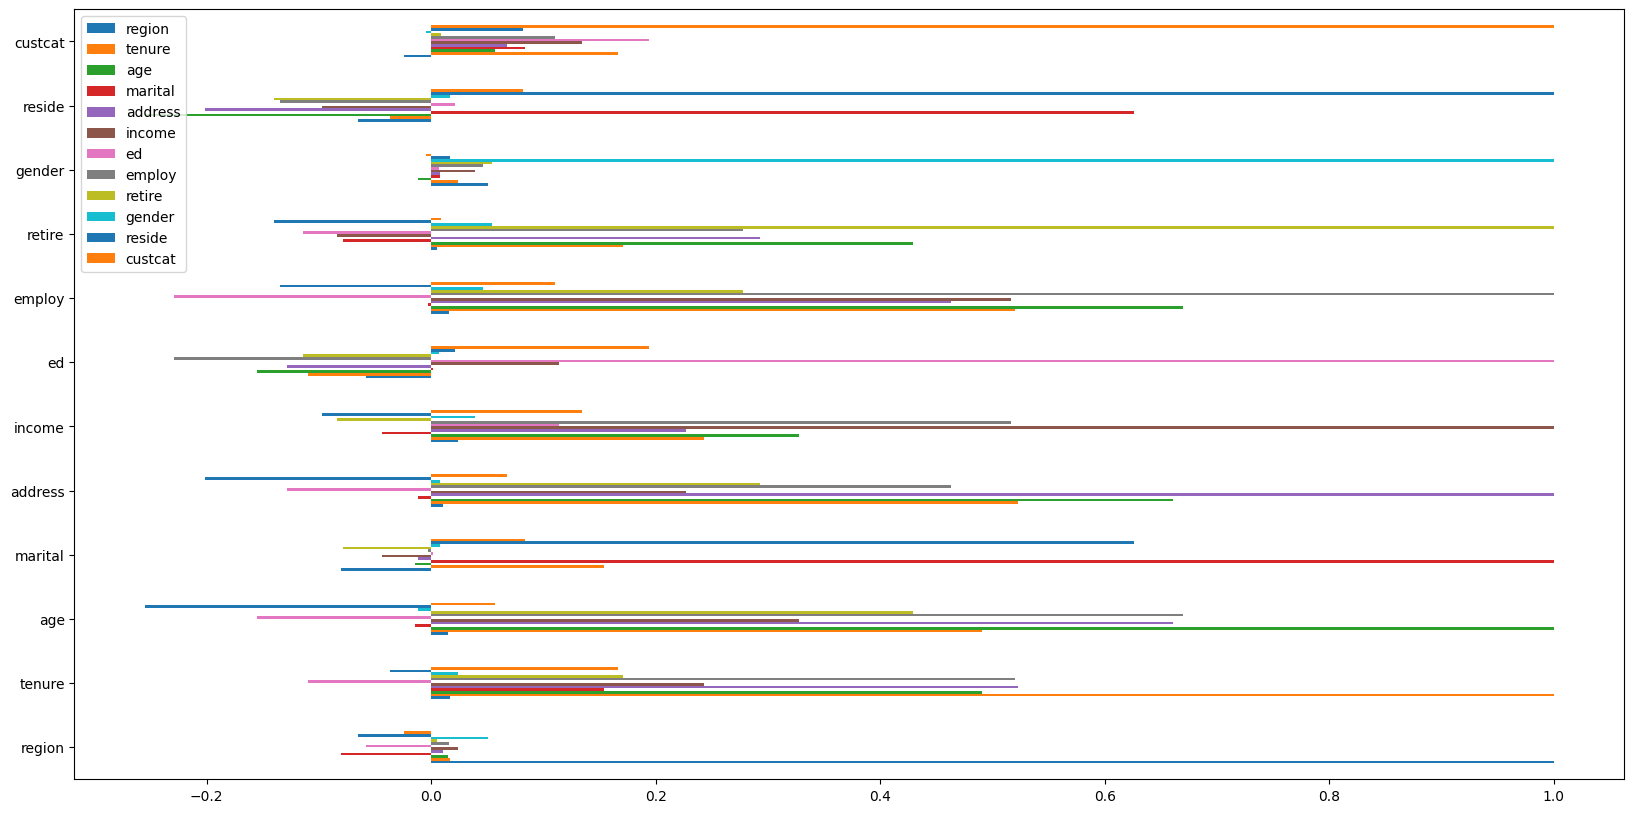

In [21]:
correlation_matrix.plot(kind='barh',figsize=(20,10))

In [22]:
correlation_val=df.corr()['custcat'].drop('custcat')

In [23]:
correlation_val

region    -0.023771
tenure     0.166691
age        0.056909
marital    0.083836
address    0.067913
income     0.134525
ed         0.193864
employ     0.110011
retire     0.008908
gender    -0.004966
reside     0.082022
Name: custcat, dtype: float64

<Axes: >

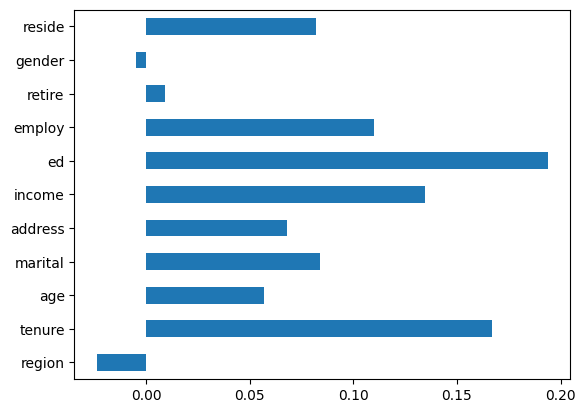

In [24]:
correlation_val.plot(kind='barh')

In [27]:
correlation_valuees

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

<Axes: ylabel='custcat'>

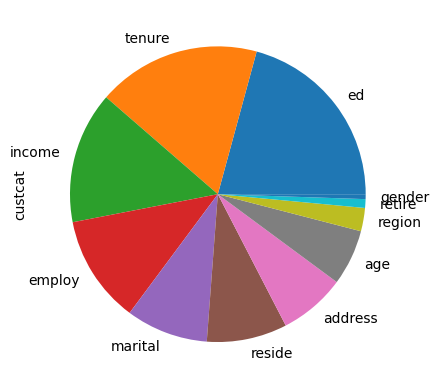

In [26]:
correlation_valuees = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_valuees.plot(kind='pie')

In [28]:
x=df.drop('custcat',axis=1)

In [29]:
y=df['custcat']

In [31]:
x_norm=StandardScaler().fit_transform(x)

In [32]:
x_norm

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2,random_state=42)

In [34]:
k=3
knn_classifier=KNeighborsClassifier(n_neighbors=k)
knn_model=knn_classifier.fit(x_train,y_train)

In [35]:
knn_model

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_hat=knn_model.predict(x_test)

In [37]:
y_hat

array([2, 2, 3, 3, 3, 3, 4, 2, 1, 4, 2, 3, 4, 3, 1, 2, 4, 4, 1, 1, 1, 1,
       3, 3, 3, 3, 2, 1, 4, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 3, 3, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       4, 1, 1, 1, 3, 4, 3, 1, 2, 1, 3, 3, 3, 1, 1, 1, 2, 2, 3, 1, 1, 1,
       2, 2, 4, 3, 2, 3, 3, 2, 2, 1, 4, 1, 2, 3, 1, 2, 2, 1, 1, 3, 1, 2,
       4, 1, 4, 1, 3, 4, 1, 3, 3, 4, 4, 2, 2, 3, 4, 1, 3, 3, 1, 3, 3, 4,
       1, 1, 4, 4, 3, 2, 1, 1, 2, 1, 1, 2, 1, 4, 4, 3, 1, 3, 3, 4, 1, 2,
       3, 1, 1, 3, 2, 1, 1, 1, 2, 3, 1, 3, 2, 1, 1, 4, 3, 3, 4, 4, 3, 4,
       4, 1, 3, 1, 2, 3, 4, 2, 1, 4, 2, 2, 3, 1, 2, 2, 1, 1, 1, 1, 1, 4,
       2, 3], dtype=int64)

In [39]:
x_train[0]

array([-0.02696767, -1.055125  , -0.69181243,  1.0100505 , -0.25303431,
       -0.54710399,  1.0877526 , -1.09029981, -0.22207644,  0.96655883,
       -0.23065004])

# Low accuracy score
--------so increase the k value

In [40]:
accuracy_score(y_test,y_hat)

0.365

In [65]:
some=[]
for i in range(1,30,2):
    knn_class=KNeighborsClassifier(n_neighbors=i)
    knn_out=knn_class.fit(x_train,y_train)
    y_hatty=knn_out.predict(x_test)
    a=accuracy_score(y_test,y_hatty)
    some.append(a)

In [66]:
random=[]
for i in range(10,50,2):
    knn_class=KNeighborsClassifier(n_neighbors=i)
    knn_out=knn_class.fit(x_train,y_train)
    y_hatty=knn_out.predict(x_test)
    a=accuracy_score(y_test,y_hatty)
    random.append(a)

In [67]:
random

[0.35,
 0.345,
 0.375,
 0.355,
 0.39,
 0.355,
 0.355,
 0.345,
 0.355,
 0.335,
 0.33,
 0.34,
 0.355,
 0.375,
 0.375,
 0.385,
 0.365,
 0.375,
 0.34,
 0.355]

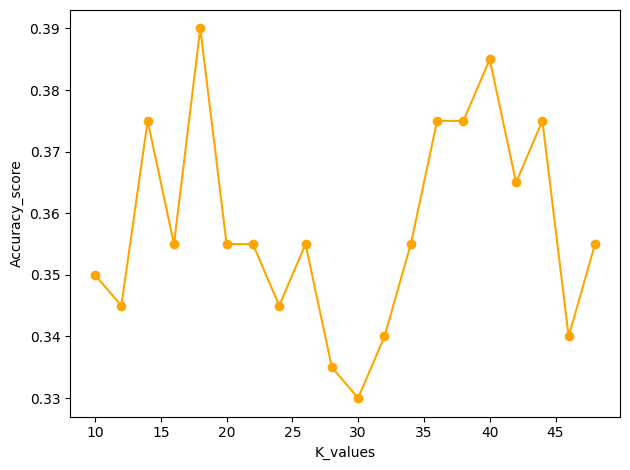

In [70]:
plt.plot(k_values,random,marker='o',linestyle='-',color='orange')
plt.xlabel('K_values')
plt.ylabel('Accuracy_score')
plt.tight_layout()